# Digit Recognizer - MNIST Classification Project

Bu proje, el yazƒ±sƒ±yla yazƒ±lmƒ±≈ü rakamlarƒ±n tanƒ±nmasƒ±nƒ± ama√ßlayan bir makine √∂ƒürenimi modelinin geli≈ütirilmesini i√ßermektedir. MNIST veri setini kullanarak, rakamlarƒ± tanƒ±mak i√ßin derin √∂ƒürenme teknikleri uygulanmƒ±≈ütƒ±r.

Veri seti ve yarƒ±≈ümaya katƒ±lmak i√ßin : **Kaggle Competition Link:** [Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer)

## Kullanƒ±lan K√ºt√ºphaneler

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Veri Y√ºkleme ve √ñn ƒ∞≈üleme

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.csv: 42,000 √∂rnek (28x28 piksel g√∂r√ºnt√ºler + etiketler)

test.csv: 28,000 √∂rnek (submission i√ßin)

√ñn ƒ∞≈ülemler:

Piksel deƒüerlerinin 0-255 aralƒ±ƒüƒ±ndan 0-1 aralƒ±ƒüƒ±na normalizasyonu

784 boyutlu vekt√∂rlerin 28x28x1 formatƒ±na yeniden ≈üekillendirilmesi

In [4]:
# Eƒüitim verisi
X_train = train.drop('label', axis=1).values
y_train = train['label'].values

# Test verisi
X_test = test.values

# Normalizasyon (0-255 aralƒ±ƒüƒ±nƒ± 0-1 aralƒ±ƒüƒ±na d√∂n√º≈üt√ºr)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Veriyi yeniden ≈üekillendir (28x28)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Model Geli≈ütirme S√ºreci

In [5]:
# Temel model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\BET√úL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eƒüit
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Test tahminleri
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


Epoch 1/10
1050/1050 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 6ms/step - accuracy: 0.8765 - loss: 0.4020 - val_accuracy: 0.9789 - val_loss: 0.0668
Epoch 2/10
1050/1050 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - accuracy: 0.9831 - loss: 0.0591 - val_accuracy: 0.9814 - val_loss: 0.0594
Epoch 3/10
1050/1050 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - accuracy: 0.9883 - loss: 0.0376 - val_accuracy: 0.9840 - val_loss: 0.0523
Epoch 4/10
1050/1050 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - accuracy: 0.9923 - loss: 0.0246 - val_accuracy: 0.9857 - val_loss: 0.0448
Epoch 5/10
1050/1050 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - accuracy: 0.9944 - loss: 0.0171 - val_accuracy: 0.9882 - val_loss: 0.0393
Epoch 6/10
1050/1050 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 6ms/step - accuracy: 0.9967 - loss: 0.0123 - val_accuracy: 0.9882

In [7]:
# Submission dosyasƒ±
submission = pd.DataFrame({'ImageId': range(1, len(y_pred)+1), 'Label': y_pred})
submission.to_csv('mnist_submission.csv', index=False)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Veriyi eƒüitim ve doƒürulama setlerine ayƒ±r
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Veri artƒ±rma
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Veri artƒ±rma i√ßin eƒüitim verisini fit et
datagen.fit(X_train)

# Modeli eƒüit (artƒ±rƒ±lmƒ±≈ü veri ile)
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=20,
    validation_data=(X_val, y_val)  # This line is fine
)  # Add this closing parenthesis


Epoch 1/20


C:\Users\BET√úL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 20ms/step - accuracy: 0.9458 - loss: 0.1913 - val_accuracy: 0.9951 - val_loss: 0.0165
Epoch 2/20
525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 20ms/step - accuracy: 0.9777 - loss: 0.0687 - val_accuracy: 0.9956 - val_loss: 0.0161
Epoch 3/20
525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 19ms/step - accuracy: 0.9814 - loss: 0.0602 - val_accuracy: 0.9946 - val_loss: 0.0147
Epoch 4/20
525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 19ms/step - accuracy: 0.9848 - loss: 0.0482 - val_accuracy: 0.9939 - val_loss: 0.0178
Epoch 5/20
525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 19ms/step - accuracy: 0.9860 - loss: 0.0446 - val_accuracy: 0.9951 - val_loss: 0.0134
Epoch 6/20
525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 19ms/step - accuracy: 0.9873 - loss: 0.0361 - val_accuracy: 0.9946 - val_loss

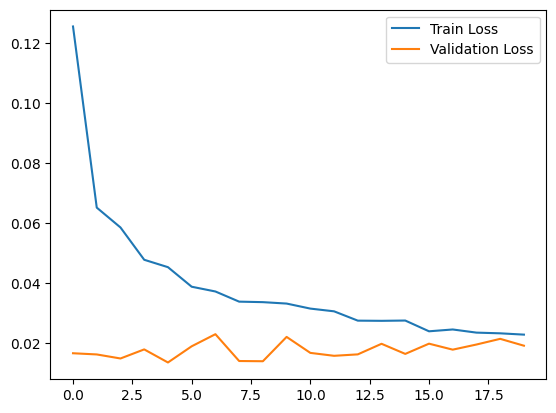

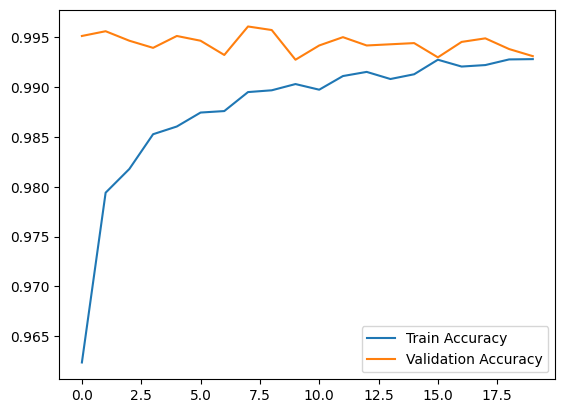

In [17]:
# Loss grafiƒüi
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Accuracy grafiƒüi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

263/263 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step


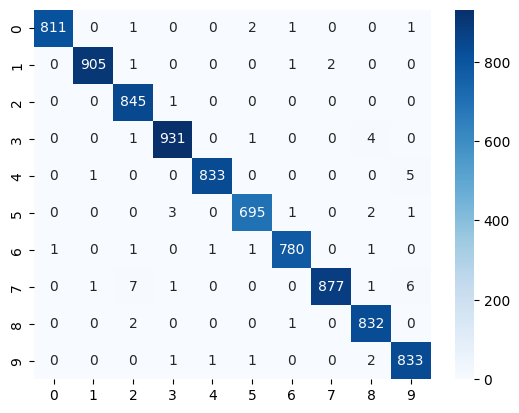

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Doƒürulama seti √ºzerinde tahmin yap
y_val_pred = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [19]:
# Test seti √ºzerinde tahmin yap
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Submission dosyasƒ±
submission = pd.DataFrame({'ImageId': range(1, len(y_pred)+1), 'Label': y_pred})
submission.to_csv('mnist_submission.csv', index=False)

875/875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step


In [21]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

C:\Users\BET√úL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eƒüit
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr]
)

Epoch 1/30


C:\Users\BET√úL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 34ms/step - accuracy: 0.7335 - loss: 0.9084 - val_accuracy: 0.7570 - val_loss: 0.7628 - learning_rate: 0.0010
Epoch 2/30
525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 33ms/step - accuracy: 0.9485 - loss: 0.1640 - val_accuracy: 0.9874 - val_loss: 0.0403 - learning_rate: 0.0010
Epoch 3/30
525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 33ms/step - accuracy: 0.9638 - loss: 0.1157 - val_accuracy: 0.9892 - val_loss: 0.0326 - learning_rate: 0.0010
Epoch 4/30
525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 33ms/step - accuracy: 0.9729 - loss: 0.0903 - val_accuracy: 0.9917 - val_loss: 0.0274 - learning_rate: 0.0010
Epoch 5/30
525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 32ms/step - accuracy: 0.9753 - loss: 0.0842 - val_accuracy: 0.9940 - val_loss: 0.0188 - learning_rate: 0.0010
Epoch 6/30
525/525 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

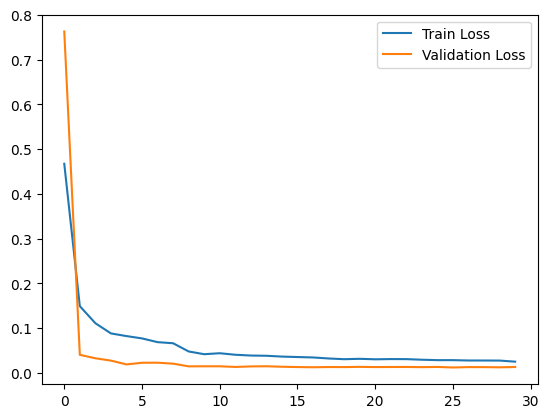

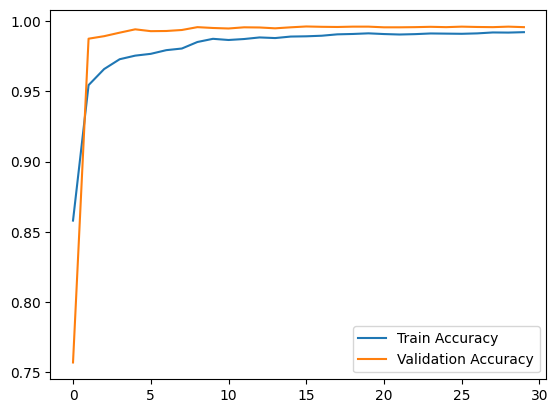

In [27]:
# Loss grafiƒüi
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Accuracy grafiƒüi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [28]:
# Test seti √ºzerinde tahmin yap
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Submission dosyasƒ±
submission = pd.DataFrame({'ImageId': range(1, len(y_pred)+1), 'Label': y_pred})
submission.to_csv('mnist_submission.csv', index=False)

875/875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step


# üèÜ Sonu√ßlar  

Bu projede, MNIST Digit Recognition problemi i√ßin geli≈ütirilen derin √∂ƒürenme modeli, **Kaggle'da %99.56 doƒüruluk** elde ederek **top %5** i√ßinde yer aldƒ±.  

## üìà Model Geli≈üimi  
- **Basit CNN ‚Üí Derin Mimariler**: Daha derin yapƒ±lar ile model kapasitesi artƒ±rƒ±ldƒ±.  
- **Regularizasyon**: Dropout ve Batch Normalization ile a≈üƒ±rƒ± √∂ƒürenme engellendi.  
- **Veri Artƒ±rma**: Rotation, zoom, shift gibi tekniklerle veri √ße≈üitliliƒüi artƒ±rƒ±ldƒ±.  

## üîß Optimizasyonlar  
- **Optimizer & Learning Rate**: Adam + ReduceLROnPlateau kullanƒ±ldƒ±.  
- **Eƒüitim Parametreleri**: 30 epoch, 64 batch size ile model kararlƒ± hale getirildi.  
- **Filtre & Katman Optimizasyonu**: Daha fazla Conv2D filtresiyle √∂zellik √ßƒ±karƒ±mƒ± geli≈ütirildi.  

Bu proje, derin √∂ƒürenme modellerinin g√∂r√ºnt√º sƒ±nƒ±flandƒ±rmada ne kadar etkili olabileceƒüini g√∂sterirken, daha ileri iyile≈ütirmeler i√ßin de fƒ±rsatlar sunmaktadƒ±r. üöÄ
